In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Tech/OneDrive/Documenten/datasets/laptop_price.csv', encoding = 'latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.shape

(1303, 13)

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

THERE ARE NO MISSING ROWS AT ALL

In [9]:
df.duplicated().sum()

np.int64(0)

THERE ARE NO DUPLICATE ROWS

In [10]:
# Extract numerical values from string columns
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [11]:
# Extract screen resolution details
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [12]:
# Extract resolution values
def extract_resolution(res):
    try:
        return int(res.split()[-1].split('x')[0]), int(res.split()[-1].split('x')[1])
    except:
        return 1366, 768  # Default resolution
df['X_res'] = df['ScreenResolution'].apply(lambda x: extract_resolution(x)[0])
df['Y_res'] = df['ScreenResolution'].apply(lambda x: extract_resolution(x)[1])
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5 / df['Inches']).astype('float')


In [13]:
# Process CPU data
df['Cpu Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Cpu Speed'] = df['Cpu'].apply(lambda x: float(x.split()[-1].replace('GHz', '')) if 'GHz' in x else 2.5)

In [14]:
# Process GPU data
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0] if x != 'ARM Mali' else 'ARM')

In [15]:
# Check for outliers in numerical columns
numerical_cols = ['Inches', 'Ram', 'Weight', 'Price_euros']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")



Number of outliers in Inches: 39

Number of outliers in Ram: 221

Number of outliers in Weight: 46

Number of outliers in Price_euros: 29


In [16]:
# Handle outliers by capping
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [17]:
# Drop unnecessary columns
df.drop(columns=['laptop_ID', 'Product', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu'], inplace=True)

In [18]:
# Display cleaned dataset info
print("\nCleaned Dataset Info:")
print(df.info())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   float64
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float64
 6   Price_euros  1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   X_res        1303 non-null   int64  
 10  Y_res        1303 non-null   int64  
 11  PPI          1303 non-null   float64
 12  Cpu Brand    1303 non-null   object 
 13  Cpu Speed    1303 non-null   float64
 14  Gpu Brand    1303 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 152.8+ KB
None


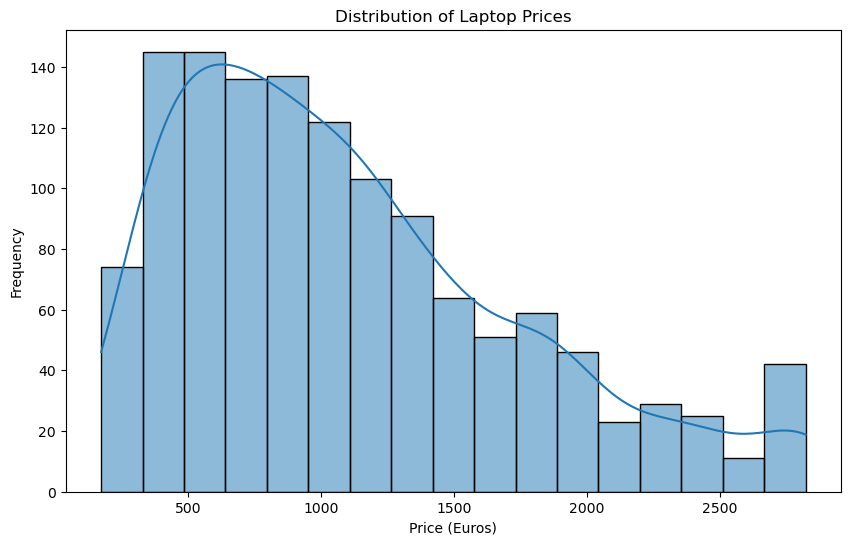

In [19]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.show()

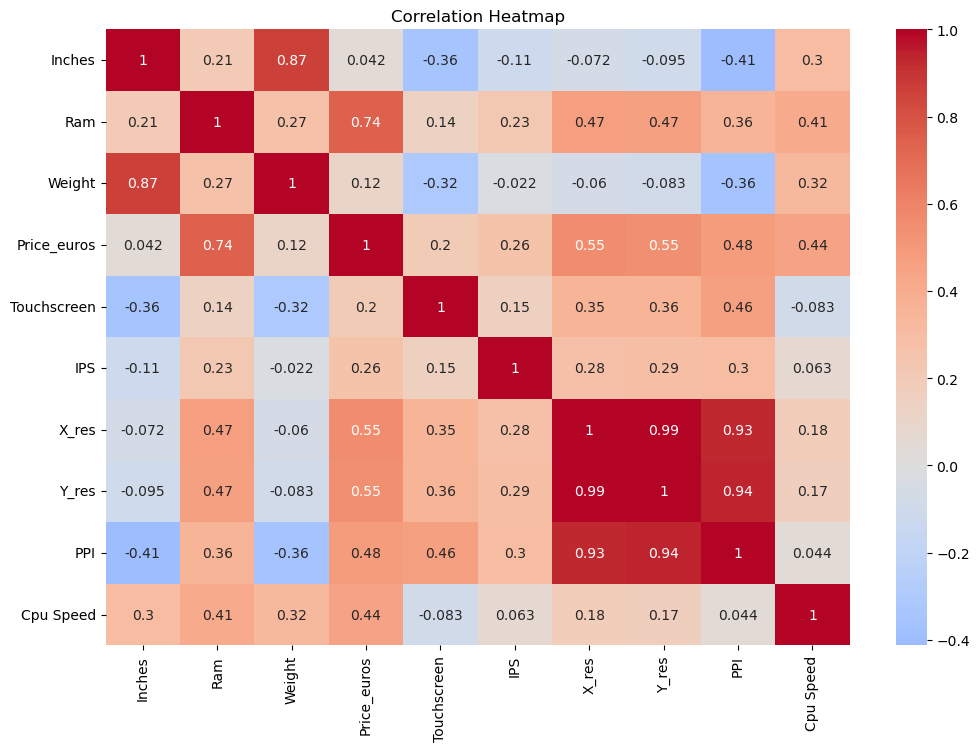

In [20]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

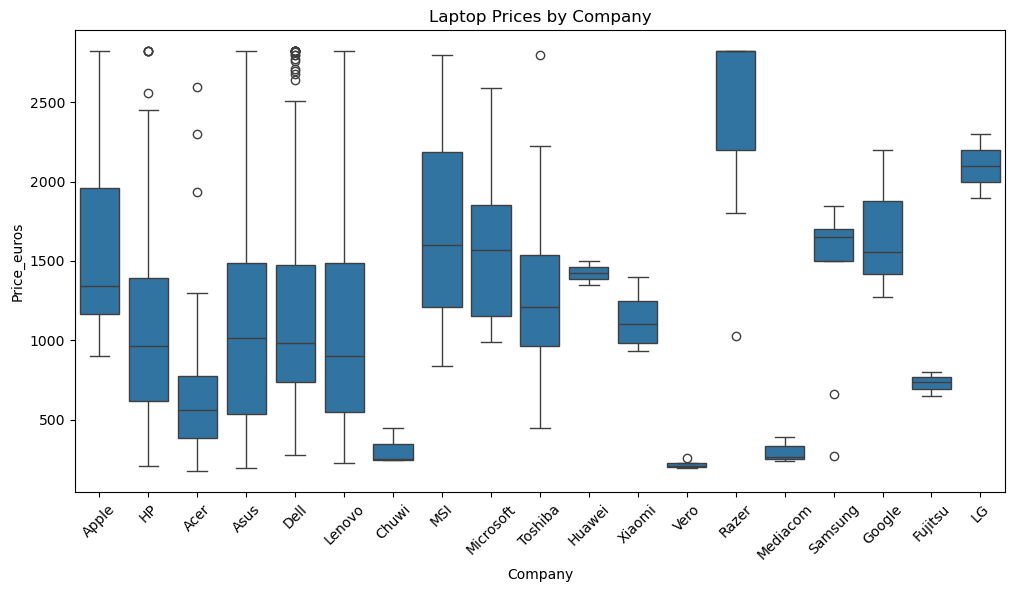

In [21]:
# Price by company
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=45)
plt.title('Laptop Prices by Company')
plt.show()

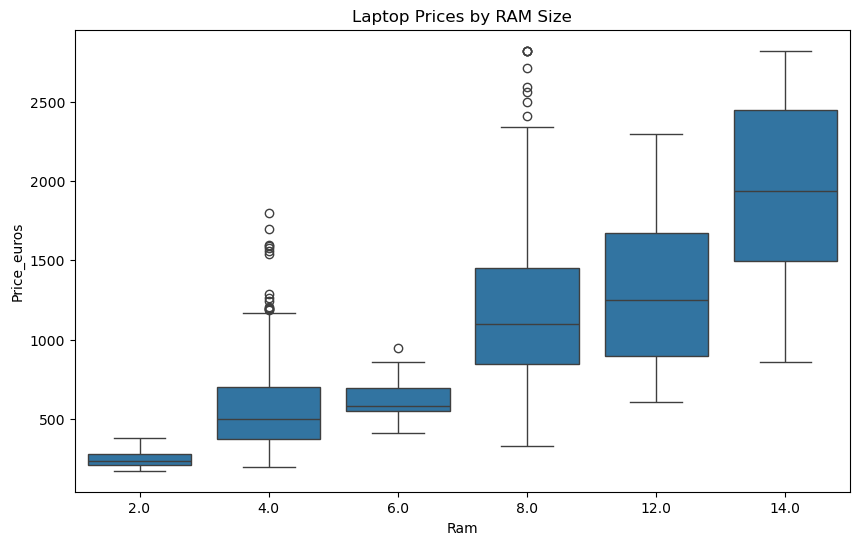

In [22]:
# Price by RAM
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Laptop Prices by RAM Size')
plt.show()

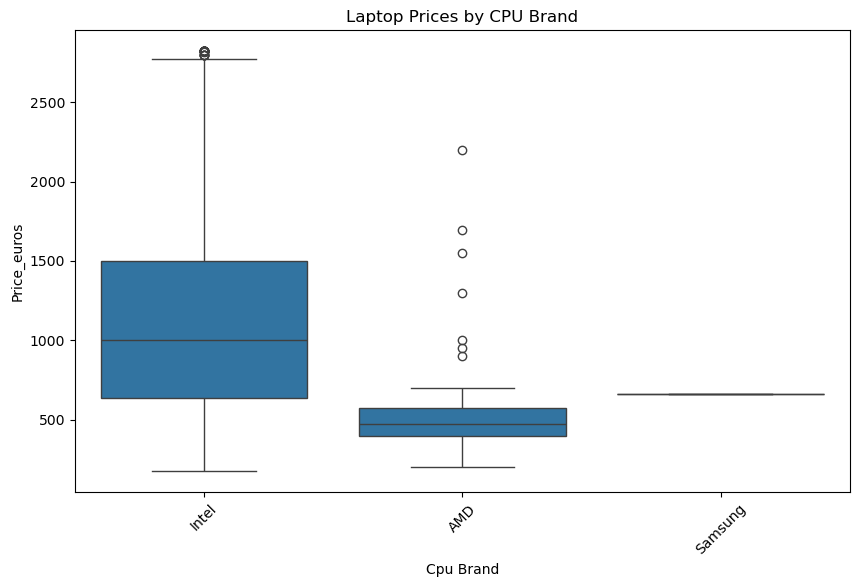

In [23]:
# Price by CPU brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cpu Brand', y='Price_euros', data=df)
plt.xticks(rotation=45)
plt.title('Laptop Prices by CPU Brand')
plt.show()

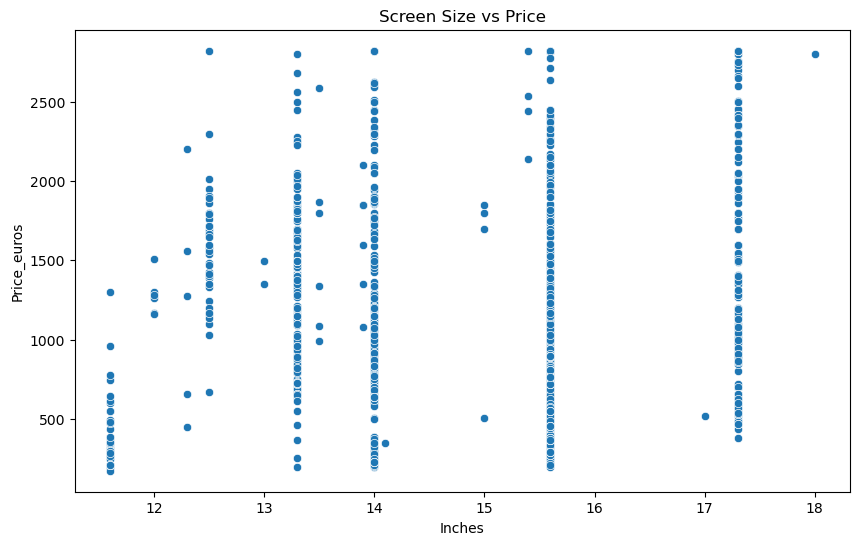

In [24]:

# Scatter plot: Inches vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=df)
plt.title('Screen Size vs Price')
plt.show()

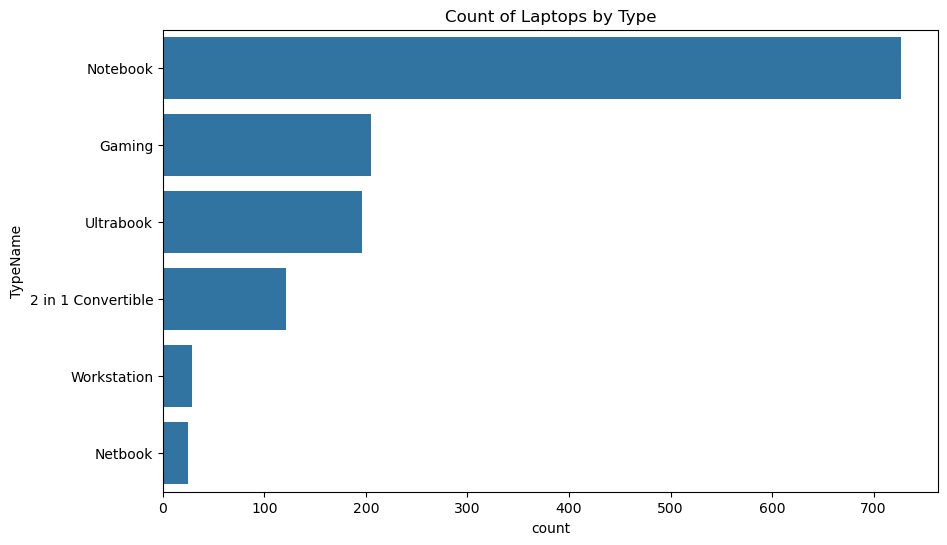

In [25]:
# Count of laptops by type
plt.figure(figsize=(10, 6))
sns.countplot(y='TypeName', data=df, order=df['TypeName'].value_counts().index)
plt.title('Count of Laptops by Type')
plt.show()

In [26]:
## 3. Feature Engineering
# Encode categorical variables
categorical_cols = ['Company', 'TypeName', 'OpSys', 'Cpu Brand', 'Gpu Brand']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [27]:
# Display the shape after encoding
print(f"Shape after encoding: {df_encoded.shape}")

# Check the correlation of features with target
correlation_with_target = df_encoded.corr()['Price_euros'].sort_values(ascending=False)
print("\nTop 10 features correlated with price:")
print(correlation_with_target.head(10))

print("\nBottom 10 features correlated with price:")
print(correlation_with_target.tail(10))

Shape after encoding: (1303, 46)

Top 10 features correlated with price:
Price_euros           1.000000
Ram                   0.741961
X_res                 0.553201
Y_res                 0.550659
PPI                   0.482624
Cpu Speed             0.442926
TypeName_Gaming       0.375901
Gpu Brand_Nvidia      0.345518
TypeName_Ultrabook    0.285983
IPS                   0.262653
Name: Price_euros, dtype: float64

Bottom 10 features correlated with price:
Company_HP          -0.042040
Company_Chuwi       -0.059307
Company_Vero        -0.076859
Company_Mediacom    -0.092936
TypeName_Netbook    -0.102730
OpSys_Chrome OS     -0.125519
OpSys_Linux         -0.170827
Gpu Brand_Intel     -0.175319
OpSys_No OS         -0.186976
TypeName_Notebook   -0.576427
Name: Price_euros, dtype: float64


In [28]:
## 4.  Model building
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [29]:
#  Identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [30]:
#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#  Build pipeline: preprocessing + linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)], remainder='drop' )),    # drop any other columns not listed
    ('regressor', LinearRegression())])

In [32]:
#  Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Inches', 'Ram', 'Weight',
                                                   'Touchscreen', 'IPS',
                                                   'X_res', 'Y_res', 'PPI',
                                                   'Cpu Speed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Cpu Brand',
                                                   'Gpu Brand'])])),
                ('regressor', LinearRegression())])

In [33]:
## 5. Model Evaluation
# Make predictions on test set

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance Metrics:
Root Mean Squared Error (RMSE): 317.86
Mean Absolute Error (MAE): 246.39
R-squared (R²): 0.7260


In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (1042, 14)
Testing set shape: (261, 14)


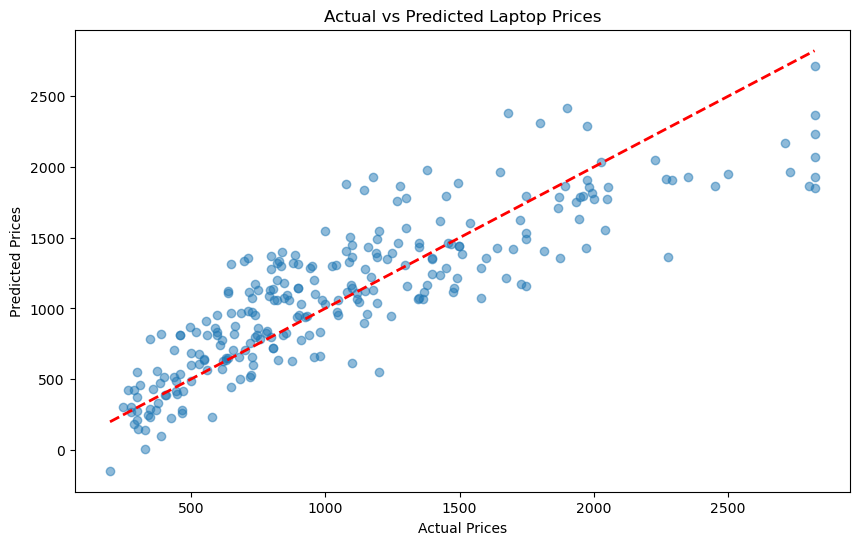

In [35]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()

In [36]:
# Check coefficient importance
import numpy as np
import pandas as pd

# Access LinearRegression inside the pipeline
lr_model = pipeline.named_steps['regressor']

# Get numeric features
numeric_features = pipeline.named_steps['preprocessor'].transformers_[0][2]

# Get categorical features after one-hot encoding
cat_encoder = pipeline.named_steps['preprocessor'].transformers_[1][1]
cat_features = cat_encoder.get_feature_names_out(pipeline.named_steps['preprocessor'].transformers_[1][2])

#  Combine all feature names
all_features = np.concatenate([numeric_features, cat_features])

# Get coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print top 10
print("\nTop 10 most important features:")
print(coef_df.head(10))



Top 10 most important features:
                 Feature  Coefficient
18            Company_LG   541.410165
15        Company_Google   470.865566
41       OpSys_Windows 7   374.019935
12         Company_Chuwi  -370.284204
33  TypeName_Workstation   349.789467
23         Company_Razer   297.135657
31     TypeName_Notebook  -292.814891
1                    Ram   280.751198
21      Company_Mediacom  -260.623996
26          Company_Vero  -257.935477


In [37]:
# First, let's create a copy of our processed dataframe
cleaned_df = df.copy()

# If we want to save the encoded version for future modeling
cleaned_encoded_df = df_encoded.copy()

# Save the cleaned dataset to a CSV file
cleaned_df.to_csv('cleaned_laptop_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_laptop_data.csv'")

Cleaned dataset saved as 'cleaned_laptop_data.csv'


In [38]:
cleaned_df.to_csv('cleaned_laptop_data.csv', index=False)

In [41]:
## 8. Model deployment and basic integration (Streamlit)

In [40]:
%%writefile streamlit_app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the trained pipeline 
pipeline = joblib.load("laptop_pipeline.joblib")

st.title("Laptop Price Predictor")

# Input fields 
company = st.selectbox("Company", ["Dell", "HP", "Lenovo", "Apple", "Asus", "Acer", "MSI", "Razer", "Other"])
typename = st.selectbox("Type", ["Notebook", "Gaming", "Ultrabook", "Workstation", "Convertible", "2 in 1 Convertible", "Other"])
inches = st.slider("Screen Size (inches)", 11.0, 20.0, 15.6)
ram = st.slider("RAM (GB)", 2, 64, 8)
opsys = st.selectbox("Operating System", ["Windows 10", "Windows 7", "Mac OS", "Linux", "No OS", "Other"])
weight = st.slider("Weight (kg)", 0.8, 5.0, 2.0)
touchscreen = st.radio("Touchscreen", ["Yes", "No"])
ips = st.radio("IPS Display", ["Yes", "No"])
x_res = st.number_input("X Resolution (px)", 800, 4000, 1366)
y_res = st.number_input("Y Resolution (px)", 600, 2500, 768)
cpu_brand = st.selectbox("CPU Brand", ["Intel", "AMD", "Other"])
cpu_speed = st.number_input("CPU Speed (GHz)", 1.0, 5.5, 2.5)
gpu_brand = st.selectbox("GPU Brand", ["Intel", "Nvidia", "AMD", "Other"])

# Convert Yes/No → 0/1
touchscreen_val = 1 if touchscreen == "Yes" else 0
ips_val = 1 if ips == "Yes" else 0

# Auto-calculate PPI
ppi = ((x_res**2 + y_res**2) ** 0.5) / inches

# Build input dictionary 
user_input = {
    "Company": company,
    "TypeName": typename,
    "Inches": inches,
    "Ram": float(ram),
    "OpSys": opsys,
    "Weight": weight,
    "Touchscreen": touchscreen_val,
    "IPS": ips_val,
    "X_res": x_res,
    "Y_res": y_res,
    "PPI": ppi,
    "Cpu Brand": cpu_brand,
    "Cpu Speed": cpu_speed,
    "Gpu Brand": gpu_brand
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

st.write("### Preview of your input")
st.dataframe(input_df)

# Prediction button
if st.button("Predict Price"):
    try:
        price = pipeline.predict(input_df)[0]
        st.success(f"Estimated Laptop Price: ${price:,.2f}")
    except Exception as e:
        st.error(f"Error making prediction: {e}")


Overwriting streamlit_app.py


Command 1 for terminal: cd "C:\Users\VI NEL\Desktop\Group M
Command 2 to run streamlit: streamlit run streamlit_app.py